### Brightness Thresholding

This notebook serves a visualization tool to test the image thresholding of the MIDAP pipeline.

In [1]:
# imports
%matplotlib inline
import numpy as np

from skimage import io

import matplotlib.pyplot as plt

In [2]:
# functions
def scale_img(img, threshold):
    img = np.array(img)
    img = np.clip(img, img.min(), threshold*img.max())
    return ((img - img.min()) / (img.max() - img.min()))

In [3]:
# Definitions
# -----------

# Path to the image
img_path = "../example_data/GD_04092019AlgCo_Cas_Pos57_TXRED_Exp001.tiff"

# The frame number
frame_number = 5

# The threshold to apply
threshold = 0.5

In [4]:
# load the image and plot
img = io.imread(img_path)[frame_number]
img = scale_img(img, 1.0)
img_thres = scale_img(img, threshold)

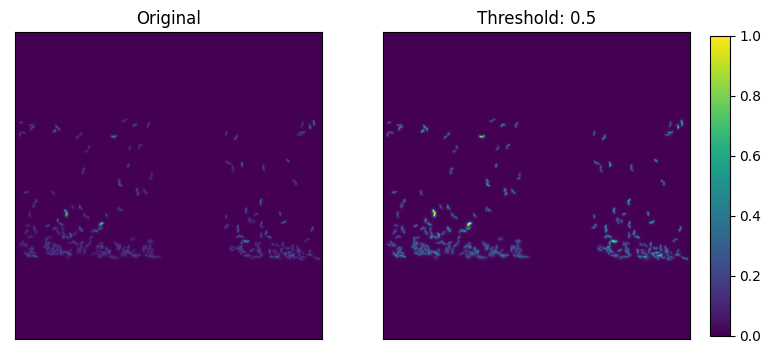

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((10,5))

p1 = ax[0].imshow(img, vmin=0.0, vmax=1.0)
ax[0].set_title("Original")
_ = ax[0].set_xticks([])
_ = ax[0].set_yticks([])

ax[1].imshow(img_thres, vmin=0.0, vmax=1.0)
ax[1].set_title(f"Threshold: {threshold}")
_ = ax[1].set_xticks([])
_ = ax[1].set_yticks([])

# colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.195, 0.02, 0.6])
fig.colorbar(p1, cax=cbar_ax)